In [98]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from datetime import timedelta 
from IPython.display import Markdown, display
import pandas as pd

import os
print(os.listdir("./input"))

['historical_transactions.csv', '.ipynb_checkpoints', 'new_merchant_transactions.csv', 'merchants.csv', 'sample_submission.csv', 'test.csv', 'Data_Dictionary.xlsx', '.gitignore', 'train.csv']


In [117]:
ndtype=[np.dtype('S7'), np.dtype('S15'), float, float, float, float]
# names = ['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target']

train        = pd.read_csv('input/train.csv', parse_dates=['first_active_month']).set_index('card_id')
test         = pd.read_csv('input/test.csv',  parse_dates=['first_active_month']).set_index('card_id')

print(test.loc['C_ID_c27b4f80f7', :])
test = test.drop(index='C_ID_c27b4f80f7')

merchants    = pd.read_csv('input/merchants.csv').set_index('merchant_id')
#transactions = pd.read_csv('../input/historical_transactions.csv')
#submission   = pd.read_csv('../input/sample_submission.csv')

X = np.genfromtxt('./input/train.csv', delimiter=',', skip_header=0, names=True, usecols=[2,3,4])

print(train.shape)

# Can't figure out how to get the features out, it's an array of
# Tuples because the datatypes are not homogeneous. 
print(X.shape)



first_active_month    NaT
feature_1               5
feature_2               2
feature_3               1
Name: C_ID_c27b4f80f7, dtype: object
(201917, 5)
(201917,)


first_active_month    datetime64[ns]
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

first_active_month    datetime64[ns]
feature_1                      int64
feature_2                      int64
feature_3                      int64
dtype: object

In [114]:
for index, row in test.iterrows():
    temp = (latest_date - row['first_active_month']).days
    if not isinstance(temp, int):
        print(index)
        print(row['first_active_month'])


## dates to numeric

In [119]:
def first_active_month_to_numeric():
    latest_date = max(train['first_active_month'].max(), test['first_active_month'].max()) + timedelta(days=1)
    train['first_active_delta_days'] = ((latest_date - train['first_active_month']).dt.days)
    test['first_active_delta_days']  = ((latest_date - test['first_active_month']).dt.days)

first_active_month_to_numeric()
display(train.head())
display(test.head())


        


,first_active_month,feature_1,feature_2,feature_3,target,first_active_delta_days
card_id,,,,,,
C_ID_92a2005557,2017-06-01,5,2,1,-0.820283,246
C_ID_3d0044924f,2017-01-01,4,1,0,0.392913,397
C_ID_d639edf6cd,2016-08-01,2,2,0,0.688056,550
C_ID_186d6a6901,2017-09-01,4,3,0,0.142495,154
C_ID_cdbd2c0db2,2017-11-01,1,3,0,-0.159749,93


,first_active_month,feature_1,feature_2,feature_3,first_active_delta_days
card_id,,,,,
C_ID_0ab67a22ab,2017-04-01,3,3,1,307
C_ID_130fd0cbdd,2017-01-01,2,3,0,397
C_ID_b709037bc5,2017-08-01,5,1,1,185
C_ID_d27d835a9f,2017-12-01,2,1,0,63
C_ID_2b5e3df5c2,2015-12-01,5,1,1,794


In [6]:
# Try using pandas and then convert to ndarray
train = pd.read_csv('./input/train.csv', sep=',')
test = pd.read_csv('./input/test.csv', sep=',')

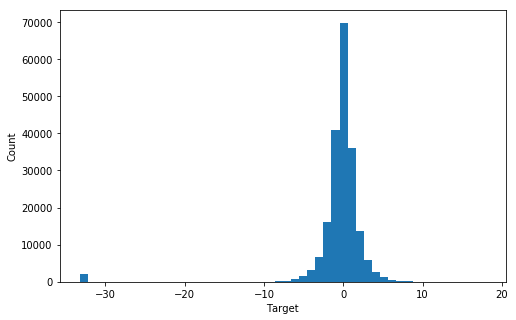

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(train.target.values, bins=50)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [4]:
display(train_df.head())
display(test_df.head())

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [27]:
# Remove non-feature data for training
training_df = train_df[['feature_1', 'feature_2', 'feature_3']]
labels_df = train_df[['target']]
test_df = test_df

display(X_df.head())
display(y_df.head())


data_len = len(training_df)
train_data = training_df.values[:int(data_len*.8)]
train_labels = labels_df.values.flatten()[:int(data_len*.8)]
test_data = training_df.values[int(data_len*.8):]
test_labels = labels_df.values.flatten()[int(data_len*.8):]


# X = training_df.values
# y = labels_df.values.flatten()
# X_test = test_df.values

# print(X.shape)
# print(y.shape)
# print(X_test.shape)

print(data_len)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
print(train_data.shape[0] + test_data.shape[0])

,feature_1,feature_2,feature_3
0,5,2,1
1,4,1,0
2,2,2,0
3,4,3,0
4,1,3,0


,target
0,-0.820283
1,0.392913
2,0.688056
3,0.142495
4,-0.159749


201917
(161533, 3)
(161533,)
(40384, 3)
(40384,)
201917


In [30]:

test = [1,2,3,4,5]
print(test[:int(len(test)*.4)])
print(test[int(len(test)*.4):])



[1, 2]
[3, 4, 5]
